In [ ]:
!pip install torch

In [2]:
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch import optim

In [3]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

image, label = train_dataset[3]
print(image.size())
print(label)

100%|██████████| 170498071/170498071 [00:05<00:00, 29725323.33it/s]


Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
4


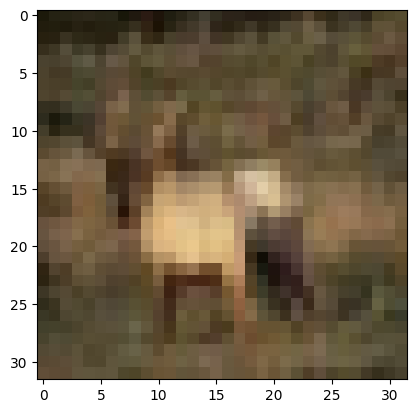

In [4]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [6]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x

net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
num_epochs = 10
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    running_items = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)

        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1} / {num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items: .3f}')
            running_loss, running_items = 0.0, 0.0

print('\nTraining is finished!')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1 / 10]. Step [1/782]. Loss:  0.036
Epoch [1 / 10]. Step [301/782]. Loss:  0.036
Epoch [1 / 10]. Step [601/782]. Loss:  0.035


 10%|█         | 1/10 [00:21<03:12, 21.38s/it]

Epoch [2 / 10]. Step [1/782]. Loss:  0.033
Epoch [2 / 10]. Step [301/782]. Loss:  0.032
Epoch [2 / 10]. Step [601/782]. Loss:  0.031


 20%|██        | 2/10 [00:36<02:22, 17.87s/it]

Epoch [3 / 10]. Step [1/782]. Loss:  0.032
Epoch [3 / 10]. Step [301/782]. Loss:  0.030
Epoch [3 / 10]. Step [601/782]. Loss:  0.030


 30%|███       | 3/10 [00:51<01:56, 16.64s/it]

Epoch [4 / 10]. Step [1/782]. Loss:  0.034
Epoch [4 / 10]. Step [301/782]. Loss:  0.029
Epoch [4 / 10]. Step [601/782]. Loss:  0.029


 40%|████      | 4/10 [01:06<01:36, 16.00s/it]

Epoch [5 / 10]. Step [1/782]. Loss:  0.026
Epoch [5 / 10]. Step [301/782]. Loss:  0.028
Epoch [5 / 10]. Step [601/782]. Loss:  0.028


 50%|█████     | 5/10 [01:22<01:18, 15.79s/it]

Epoch [6 / 10]. Step [1/782]. Loss:  0.025
Epoch [6 / 10]. Step [301/782]. Loss:  0.027
Epoch [6 / 10]. Step [601/782]. Loss:  0.027


 60%|██████    | 6/10 [01:38<01:02, 15.75s/it]

Epoch [7 / 10]. Step [1/782]. Loss:  0.028
Epoch [7 / 10]. Step [301/782]. Loss:  0.026
Epoch [7 / 10]. Step [601/782]. Loss:  0.026


 70%|███████   | 7/10 [01:54<00:48, 16.09s/it]

Epoch [8 / 10]. Step [1/782]. Loss:  0.026
Epoch [8 / 10]. Step [301/782]. Loss:  0.026
Epoch [8 / 10]. Step [601/782]. Loss:  0.026


 80%|████████  | 8/10 [02:10<00:31, 15.79s/it]

Epoch [9 / 10]. Step [1/782]. Loss:  0.029
Epoch [9 / 10]. Step [301/782]. Loss:  0.025
Epoch [9 / 10]. Step [601/782]. Loss:  0.025


 90%|█████████ | 9/10 [02:24<00:15, 15.52s/it]

Epoch [10 / 10]. Step [1/782]. Loss:  0.023
Epoch [10 / 10]. Step [301/782]. Loss:  0.025
Epoch [10 / 10]. Step [601/782]. Loss:  0.025


100%|██████████| 10/10 [02:40<00:00, 16.05s/it]

Training is finished!
